In [2]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
%matplotlib inline

# Import data

In [6]:
df = pd.read_csv('D:/Nanobi Test/nba_logreg.csv')

In [4]:
df

Name  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
0            Brandon Ingram  36  27.4   7.4  2.6   7.6  34.7      0.5  2.1   
1           Andrew Harrison  35  26.9   7.2  2.0   6.7  29.6      0.7  2.8   
2            JaKarr Sampson  74  15.3   5.2  2.0   4.7  42.2      0.4  1.7   
3               Malik Sealy  58  11.6   5.7  2.3   5.5  42.6      0.1  0.5   
4               Matt Geiger  48  11.5   4.5  1.6   3.0  52.4      0.0  0.1   
5              Tony Bennett  75  11.4   3.7  1.5   3.5  42.3      0.3  1.1   
6               Don MacLean  62  10.9   6.6  2.5   5.8  43.5      0.0  0.1   
7              Tracy Murray  48  10.3   5.7  2.3   5.4  41.5      0.4  1.5   
8              Duane Cooper  65   9.9   2.4  1.0   2.4  39.2      0.1  0.5   
9              Dave Johnson  42   8.5   3.7  1.4   3.5  38.3      0.1  0.3   
10           Corey Williams  35   6.9   2.3  0.9   2.4  36.5      0.0  0.1   
11                 Sam Mack  40   6.7   3.6  1.2   3.0  39.8      0.1  0.6   
12         Lorenzo Williams  27   6.6   1.3  0.6   1.3  47.2      0.0  0.0   
13            P.J. Hairston  45  15.3   5.6  1.9   6.0  32.3      1.1  3.6   
14           Elmore Spencer  44   6.4   2.4  1.0   1.9  53.7      0.0  0.0   
15              John Crotty  40   6.1   2.6  0.9   1.8  51.4      0.1  0.4   
16           Stephen Howard  49   5.3   2.1  0.7   1.9  37.6      0.0  0.0   
17              Randy Woods  41   4.2   1.7  0.6   1.6  34.8      0.1  0.3   
18            Larry Johnson  82  37.2  19.2  7.5  15.3  49.0      0.1  0.3   
19            Larry Johnson  82  37.2  19.2  7.5  15.3  49.0      0.1  0.3   
20              Billy Owens  80  31.4  14.3  5.9  11.1  52.5      0.0  0.1   
21            Stacey Augmon  82  30.5  13.3  5.4  11.0  48.9      0.0  0.1   
22               Mark Macon  76  30.3  10.6  4.4  11.7  37.5      0.1  0.4   
23             Steven Smith  61  29.6  12.0  4.9  10.7  45.4      0.7  2.0   
24             Mitch McGary  32  15.2   6.3  2.8   5.2  53.3      0.0  0.1   
25            Larry Stewart  76  29.3  10.4  4.0   7.8  51.4      0.0  0.0   
26           Mike Iuzzolino  52  24.6   9.3  3.1   6.8  45.1      1.1  2.6   
27               Doug Smith  76  22.5   8.8  3.8   9.2  41.5      0.0  0.1   
28              Paul Graham  78  22.0  10.1  3.9   8.7  44.7      0.7  1.8   
29             Donald Hodge  51  20.7   8.4  3.2   6.4  49.7      0.0  0.0   
...                     ...  ..   ...   ...  ...   ...   ...      ...  ...   
1310     Christian Laettner  81  34.9  18.2  6.2  13.1  47.4      0.0  0.5   
1311          Tom Gugliotta  81  34.5  14.7  6.0  14.0  42.6      0.5  1.7   
1312       Alonzo Mourning*  78  33.9  21.0  7.3  14.3  51.1      0.0  0.0   
1313         LaPhonso Ellis  82  33.5  14.7  5.9  11.7  50.4      0.0  0.2   
1314  Clarence Weatherspoon  82  32.4  15.6  6.0  12.8  46.9      0.0  0.0   
1315           Robert Horry  79  29.5  10.1  4.1   8.6  47.4      0.2  0.6   
1316             Sean Rooks  72  29.0  13.5  5.1  10.4  49.3      0.0  0.0   
1317          Walt Williams  59  28.4  17.0  6.1  13.9  43.5      1.0  3.2   
1318          Anthony Avent  82  27.9   9.8  4.2   9.8  43.3      0.0  0.0   
1319          Richard Dumas  48  27.5  15.8  6.3  12.0  52.4      0.0  0.1   
1320               Todd Day  71  27.2  13.8  5.0  11.7  43.2      0.8  2.6   
1321           Bryant Stith  39  22.2   8.9  3.2   7.1  44.6      0.0  0.1   
1322           Doug Overton  45  22.0   8.1  3.4   7.2  47.1      0.1  0.3   
1323         Anthony Peeler  77  21.5  10.4  3.9   8.2  46.8      0.6  1.5   
1324            Walter Bond  74  21.3   8.0  3.1   7.6  40.2      0.1  0.6   
1325          Andre Spencer  20  21.1   9.4  3.7   8.2  44.8      0.0  0.1   
1326          Lloyd Daniels  77  20.4   9.1  3.7   8.4  44.3      0.8  2.3   
1327          Oliver Miller  56  19.1   5.6  2.2   4.6  47.5      0.0  0.1   
1328           Harold Miner  73  18.9  10.3  4.0   8.4  47.5      0.0  0.1   
1329            T.J. Warren  40  15.4   6.1  

# Data Preparation 
## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
Name           1340 non-null object
GP             1340 non-null int64
MIN            1340 non-null float64
PTS            1340 non-null float64
FGM            1340 non-null float64
FGA            1340 non-null float64
FG%            1340 non-null float64
3P Made        1340 non-null float64
3PA            1340 non-null float64
3P%            1329 non-null float64
FTM            1340 non-null float64
FTA            1340 non-null float64
FT%            1340 non-null float64
OREB           1340 non-null float64
DREB           1340 non-null float64
REB            1340 non-null float64
AST            1340 non-null float64
STL            1340 non-null float64
BLK            1340 non-null float64
TOV            1340 non-null float64
TARGET_5Yrs    1340 non-null float64
dtypes: float64(19), int64(1), object(1)
memory usage: 219.9+ KB


In [6]:
# finding nan values
df.isnull()

# From this it is not clear about null values

Name     GP    MIN    PTS    FGM    FGA    FG%  3P Made    3PA    3P%  \
0     False  False  False  False  False  False  False    False  False  False   
1     False  False  False  False  False  False  False    False  False  False   
2     False  False  False  False  False  False  False    False  False  False   
3     False  False  False  False  False  False  False    False  False  False   
4     False  False  False  False  False  False  False    False  False  False   
5     False  False  False  False  False  False  False    False  False  False   
6     False  False  False  False  False  False  False    False  False  False   
7     False  False  False  False  False  False  False    False  False  False   
8     False  False  False  False  False  False  False    False  False  False   
9     False  False  False  False  False  False  False    False  False  False   
10    False  False  False  False  False  False  False    False  False  False   
11    False  False  False  False  False  False  False    False  False  False   
12    False  False  False  False  False  False  False    False  False  False   
13    False  False  False  False  False  False  False    False  False  False   
14    False  False  False  False  False  False  False    False  False  False   
15    False  False  False  False  False  False  False    False  False  False   
16    False  False  False  False  False  False  False    False  False  False   
17    False  False  False  False  False  False  False    False  False  False   
18    False  False  False  False  False  False  False    False  False  False   
19    False  False  False  False  False  False  False    False  False  False   
20    False  False  False  False  False  False  False    False  False  False   
21    False  False  False  False  False  False  False    False  False  False   
22    False  False  False  False  False  False  False    False  False  False   
23    False  False  False  False  False  False  False    False  False  False   
24    False  False  False  False  False  False  False    False  False  False   
25    False  False  False  False  False  False  False    False  False  False   
26    False  False  False  False  False  False  False    False  False  False   
27    False  False  False  False  False  False  False    False  False  False   
28    False  False  False  False  False  False  False    False  False  False   
29    False  False  False  False  False  False  False    False  False  False   
...     ...    ...    ...    ...    ...    ...    ...      ...    ...    ...   
1310  False  False  False  False  False  False  False    False  False  False   
1311  False  False  False  False  False  False  False    False  False  False   
1312  False  False  False  False  False  False  False    False  False  False   
1313  False  False  False  False  False  False  False    False  False  False   
1314  False  False  False  False  False  False  False    False  False  False   
1315  False  False  False  False  False  False  False    False  False  False   
1316  False  False  False  False  False  False  False    False  False  False   
1317  False  False  False  False  False  False  False    False  False  False   
1318  False  False  False  False  False  False  False    False  False  False   
1319  False  False  False  False  False  False  False    False  False  False   
1320  False  False  False  False  False  False  False    False  False  False   
1321  False  False  False  False  False  False  False    False  False  False   
1322  False  False  False  False  False  False  False    False  False  False   
1323  False  False  False  False  False  False  False    False  False  False   
1324  False  False  False  False  False  False  False    False  False  False   
1325  False  False  False  False  False  False  False    False  False  False   
1326  False  False  False  False  False  False  False    False  False  False   
1327  False  False  False  False  False  False  False    False  False  False   
1328  F

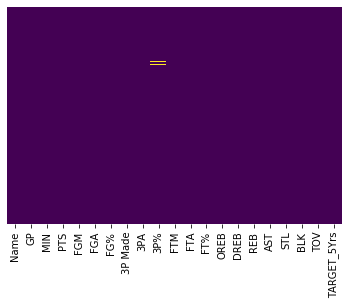

In [7]:
sns.heatmap(df.isnull(),yticklabels = False, cbar =False, cmap = 'viridis')

# by this visualization we get to know there is null value present in 3P% feature

In [8]:
# check and impute the null value
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [9]:
df['3P%'].describe()

count    1329.000000
mean       19.308126
std        16.022916
min         0.000000
25%         0.000000
50%        22.400000
75%        32.500000
max       100.000000
Name: 3P%, dtype: float64

In [22]:
# fill the null value based on mean 

df['3P%'].fillna(df['3P%'].mean(), inplace = True)

In [11]:
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

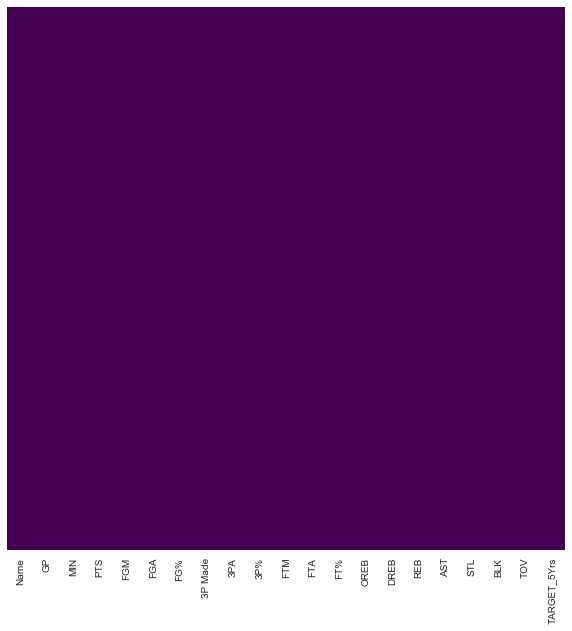

In [15]:
sns.heatmap(df.isnull(),yticklabels = False, cbar =False, cmap = 'viridis')

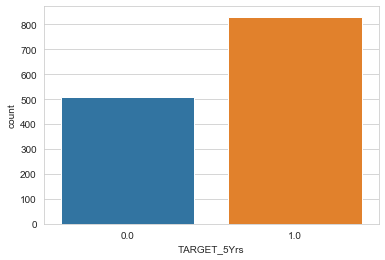

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='TARGET_5Yrs', data = df)

In [21]:
df.describe()

GP          MIN          PTS          FGM          FGA  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     60.414179    17.624627     6.801493     2.629104     5.885299   
std      17.433992     8.307964     4.357545     1.683555     3.593488   
min      11.000000     3.100000     0.700000     0.300000     0.800000   
25%      47.000000    10.875000     3.700000     1.400000     3.300000   
50%      63.000000    16.100000     5.550000     2.100000     4.800000   
75%      77.000000    22.900000     8.800000     3.400000     7.500000   
max      82.000000    40.900000    28.200000    10.200000    19.800000   

               FG%      3P Made          3PA          3P%          FTM  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean     44.169403     0.247612     0.779179    19.308126     1.297687   
std       6.137679     0.383688     1.061847    15.956966     0.987246   
min      23.800000     0.000000     0.000000     0.000000     0.000000   
25%      40.200000     0.000000     0.000000     0.000000     0.600000   
50%      44.100000     0.100000     0.300000    22.200000     1.000000   
75%      47.900000     0.400000     1.200000    32.500000     1.600000   
max      73.700000     2.300000     6.500000   100.000000     7.700000   

               FTA          FT%         OREB         DREB          REB  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean      1.821940    70.300299     1.009403     2.025746     3.034478   
std       1.322984    10.578479     0.777119     1.360008     2.057774   
min       0.000000     0.000000     0.000000     0.200000     0.300000   
25%       0.900000    64.700000     0.400000     1.000000     1.500000   
50%       1.500000    71.250000     0.800000     1.700000     2.500000   
75%       2.300000    77.600000     1.400000     2.600000     4.000000   
max      10.200000   100.000000     5.300000     9.600000    13.900000   

               AST          STL          BLK          TOV  TARGET_5Yrs  
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000  
mean      1.550522     0.618507     0.368582     1.193582     0.620149  
std       1.471169     0.409759     0.429049     0.722541     0.485531  
min       0.000000     0.000000     0.000000     0.100000     0.000000  
25%       0.600000     0.300000     0.100000     0.700000     0.000000  
50%       1.100000     0.500000     0.200000     1.000000     1.000000  
75%       2.000000     0.800000     0.500000     1.500000     1.000000  
max      10.600000     2.500000     3.900000     4.400000     1.000000

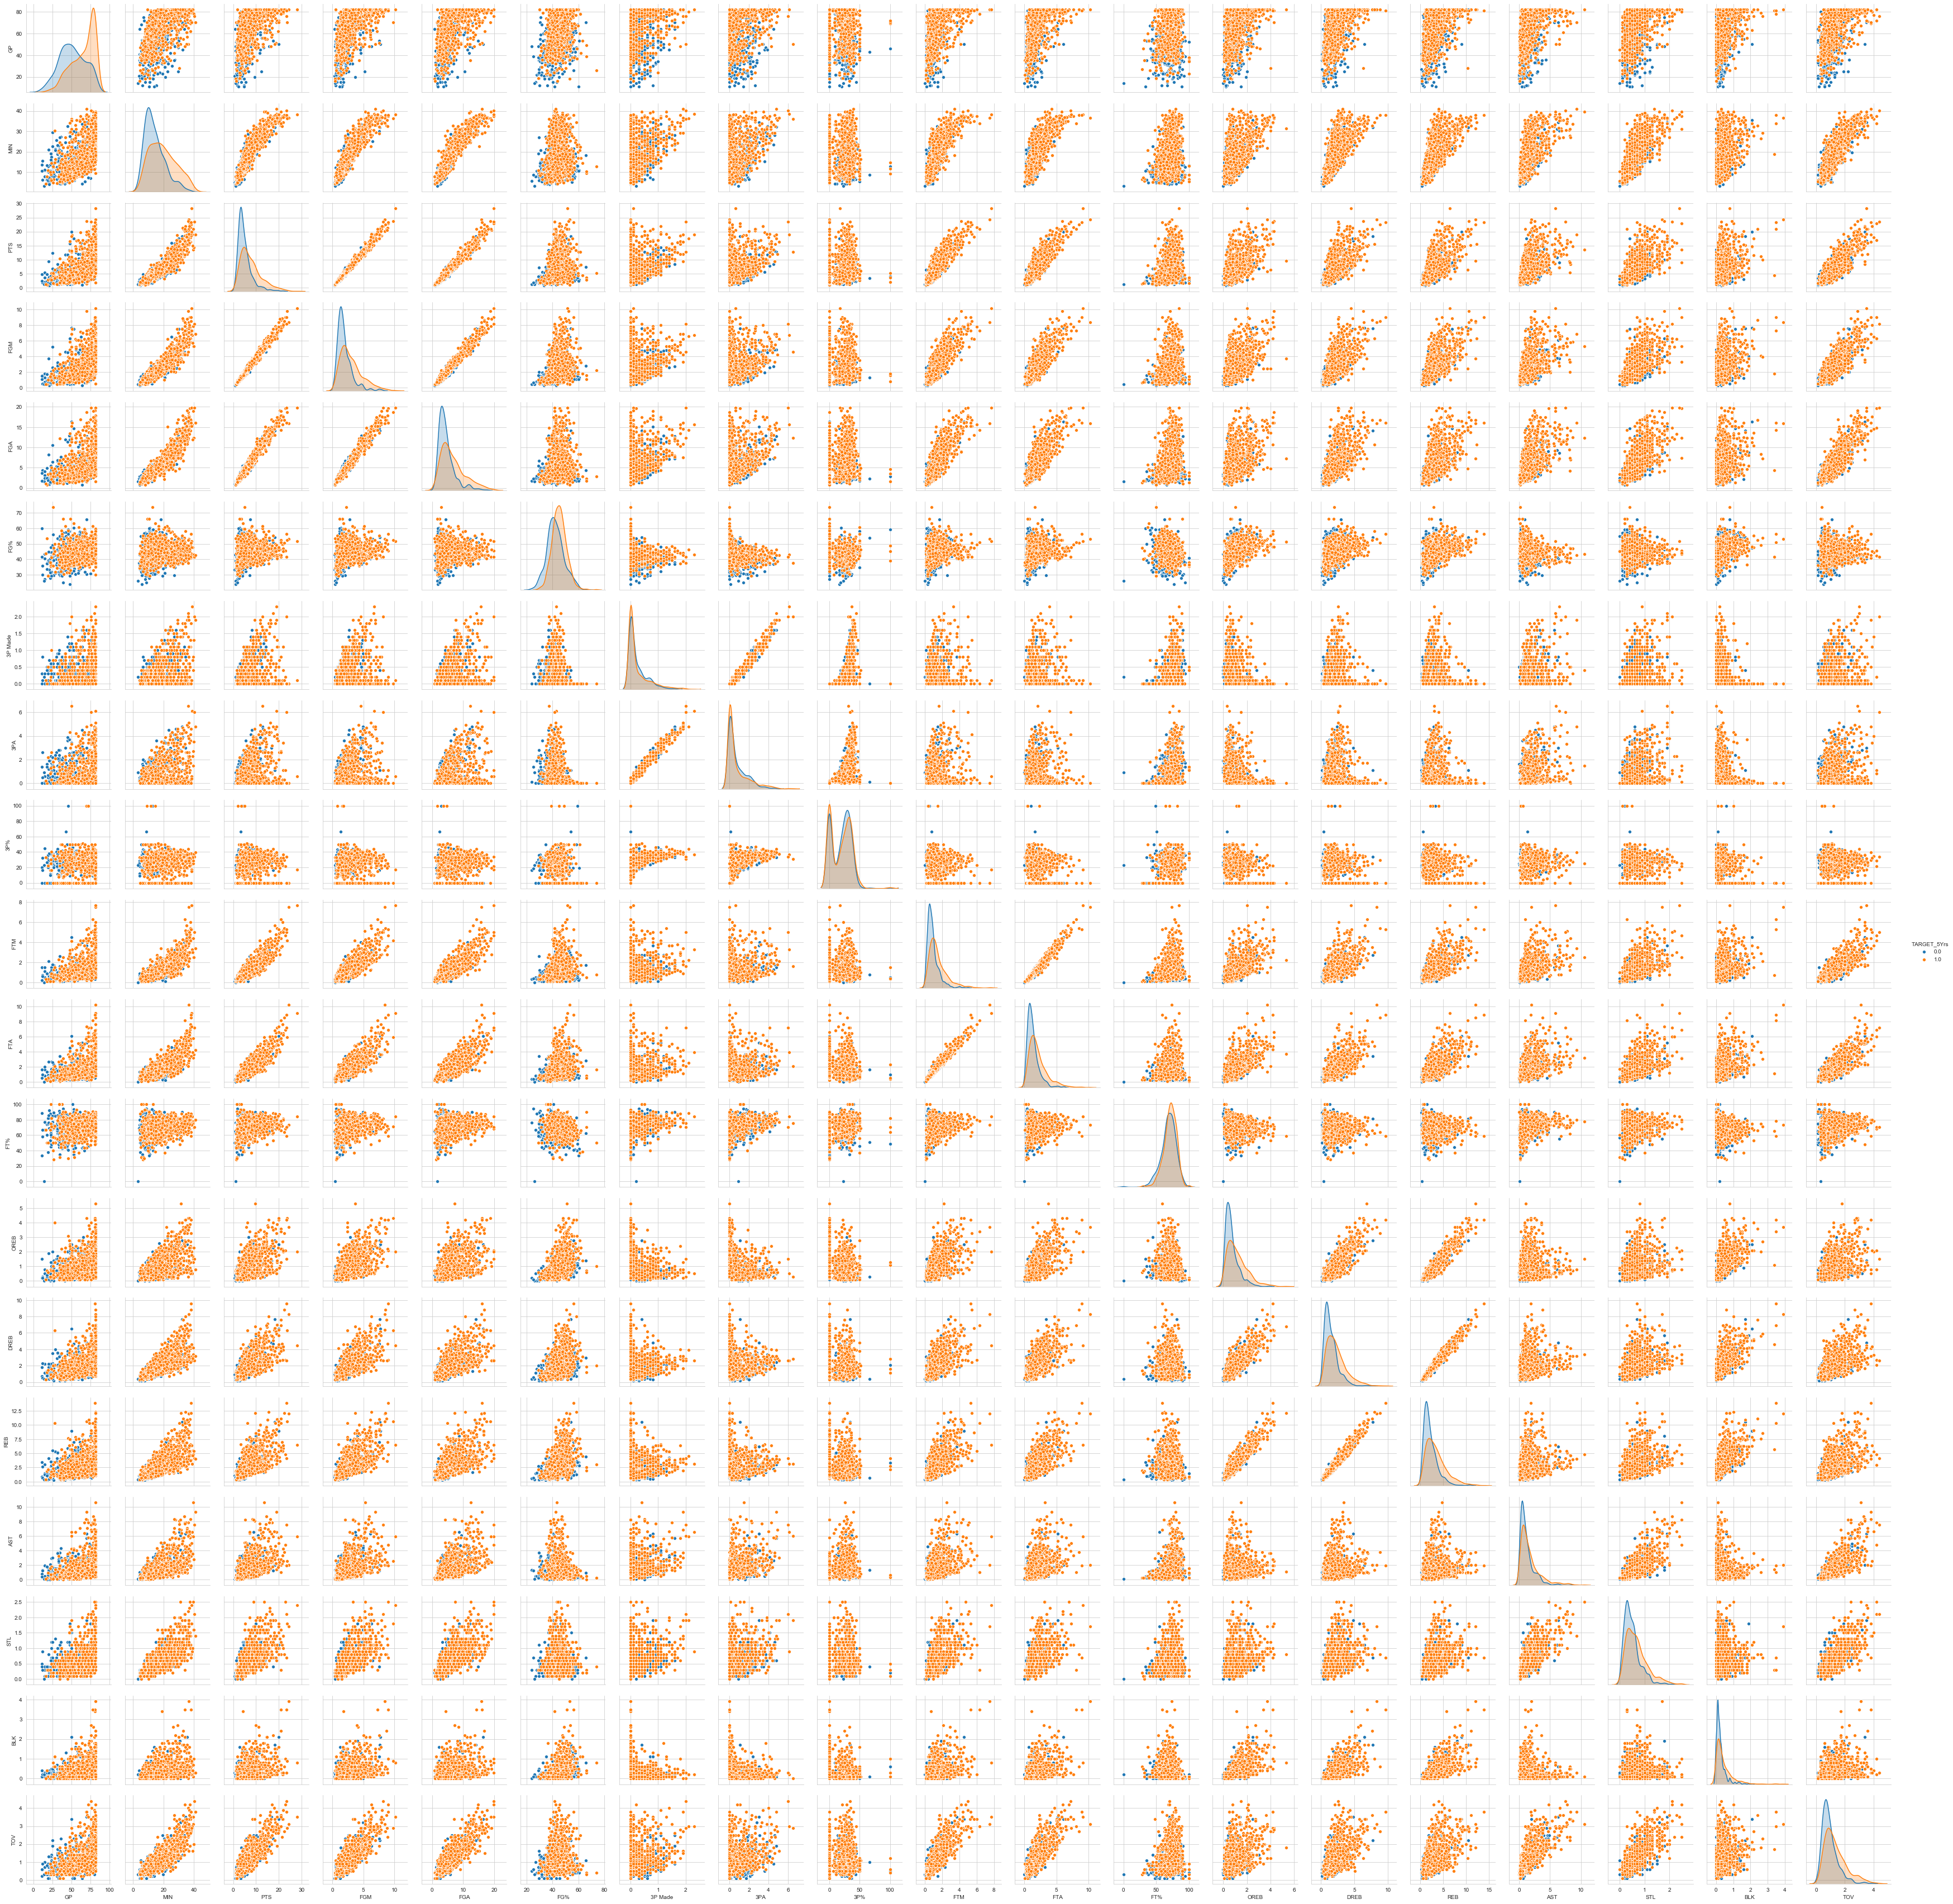

In [31]:
# Pairplot of features
sns.pairplot(df, hue = 'TARGET_5Yrs', 
             vars = features )

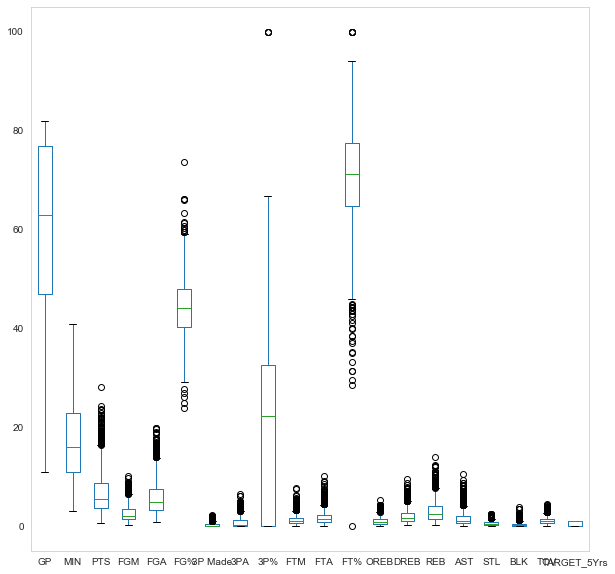

In [13]:
plt.rcParams['figure.figsize']=(10,10)
# plt.figure(figsize = (30,30))
df.plot(kind ='box', grid = False )

# here black circles or dots are indicating the outliers

In [16]:
 # or the above fogure can be interpreted as 
df.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [17]:
features = ['GP', 'MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB','DREB',           
'REB','AST','STL','BLK','TOV']

In [18]:
list(enumerate(features))

[(0, 'GP'),
 (1, 'MIN'),
 (2, 'PTS'),
 (3, 'FGM'),
 (4, 'FGA'),
 (5, 'FG%'),
 (6, '3P Made'),
 (7, '3PA'),
 (8, '3P%'),
 (9, 'FTM'),
 (10, 'FTA'),
 (11, 'FT%'),
 (12, 'OREB'),
 (13, 'DREB'),
 (14, 'REB'),
 (15, 'AST'),
 (16, 'STL'),
 (17, 'BLK'),
 (18, 'TOV')]

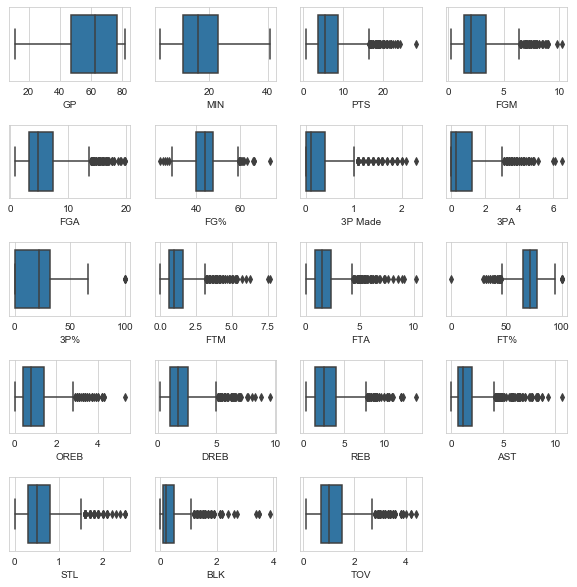

In [19]:
# Box plot 
for i in enumerate (features):
    plt.subplot(5,4,i[0]+1)
    sns.boxplot(x=df[i[1]])
    plt.subplots_adjust(hspace = 0.60)

## there are lots of outliers, each consists of row size >300, so if we remove the outliers we will loose almost 20% of the data. So we kept it as it is.

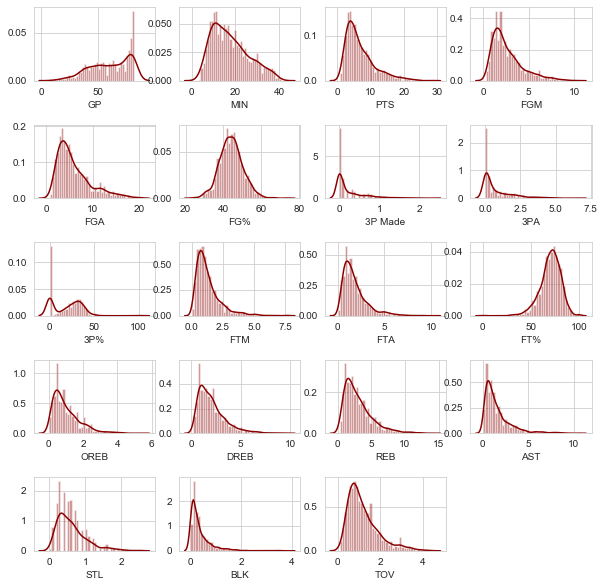

In [20]:
# distribution of data in each features
for i in enumerate (features):
    plt.subplot(5,4,i[0]+1)
    sns.distplot(df[i[1]],kde = True, color = 'darkred', bins =40)
    plt.subplots_adjust(hspace = 0.60)
#     plt.xticks(rotation = 45)

In [23]:
X = df.copy()
Y = X.pop("TARGET_5Yrs")

# creating discrete features
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes 
discrete_features = X.dtypes == int
# print(discrete_features)

def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

FGM        0.072656
FTM        0.062340
Name       0.048287
REB        0.041561
FT%        0.036363
3P Made    0.031316
3P%        0.004955
Name: MI Scores, dtype: float64

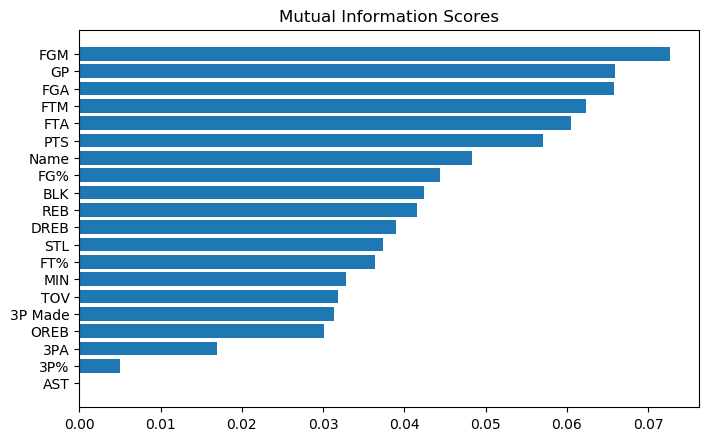

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

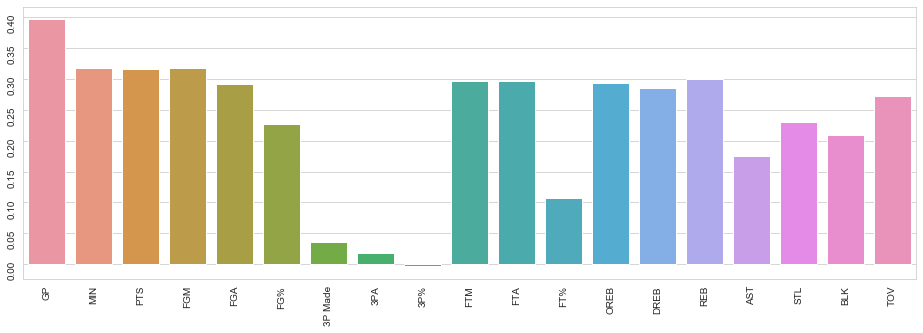

In [29]:
# correlation barplot
df2 = df.drop('TARGET_5Yrs', axis = 1)
plt.figure(figsize = (16,5))
ax = sns.barplot(df2.corrwith(df['TARGET_5Yrs']).index, df2.corrwith(df['TARGET_5Yrs']))
ax.tick_params(labelrotation = 90)

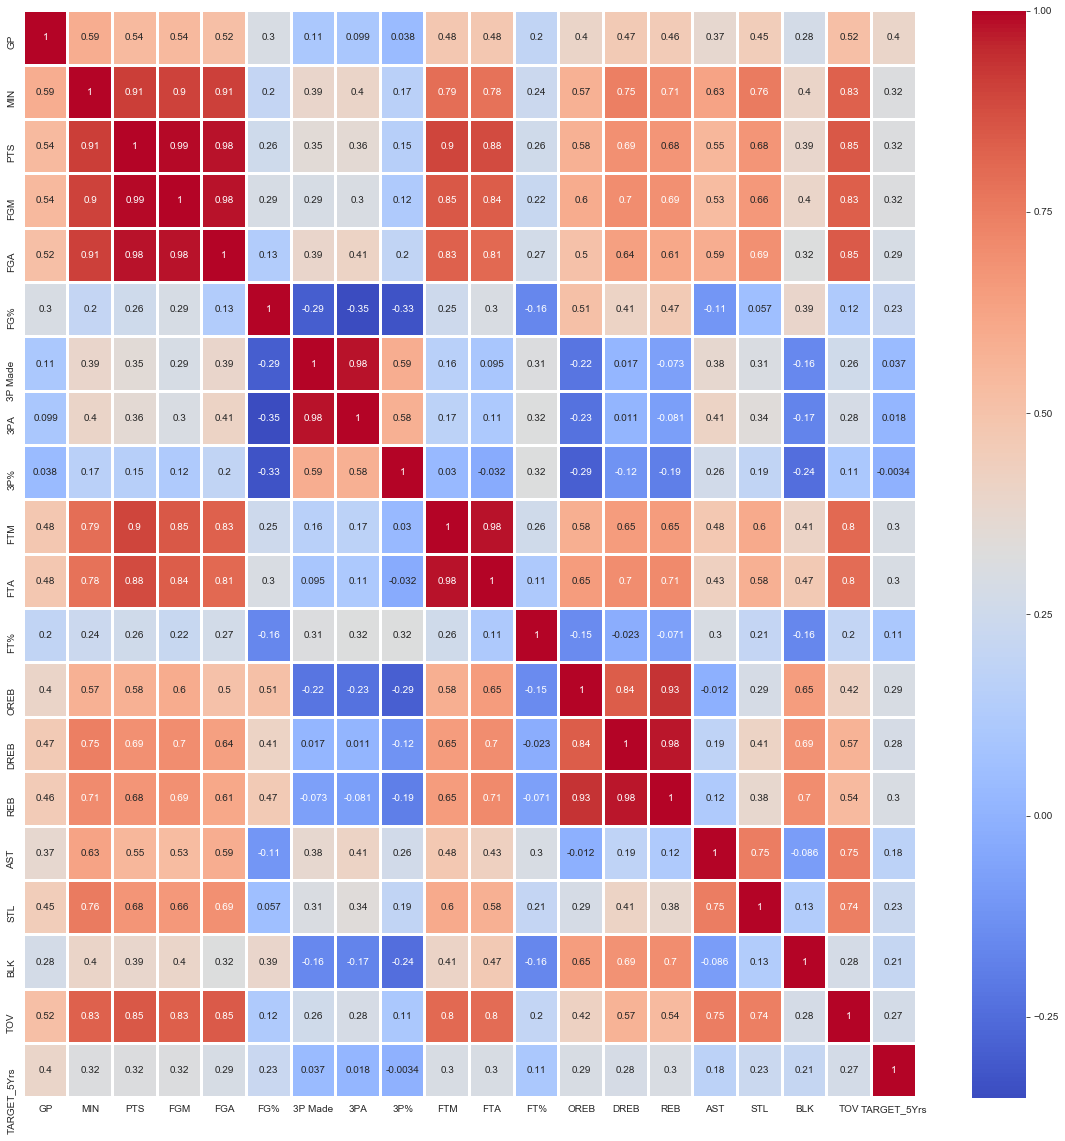

In [23]:
# heatmap correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [25]:
df1 = df.drop('Name',axis = 1)

# Train_test_Split

In [26]:
x = df1.drop('TARGET_5Yrs', axis = 1)
x.head()

GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   

   DREB  REB  AST  STL  BLK  TOV  
0   3.4  4.1  1.9  0.4  0.4  1.3  
1   2.0  2.4  3.7  1.1  0.5  1.6  
2   1.7  2.2  1.0  0.5  0.3  1.0  
3   0.9  1.9  0.8  0.6  0.1  1.0  
4   1.5  2.5  0.3  0.3  0.4  0.8

In [27]:
y =df1['TARGET_5Yrs']
y.head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: TARGET_5Yrs, dtype: float64

In [28]:
# train /test :: 80/20
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [11]:
x_train.head()

GP   MIN   PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
216  47   9.4   2.9  1.0  2.6  40.2      0.0  0.1  16.7  0.7  0.9  83.3   0.3   
731  44   9.2   3.0  1.0  3.0  35.4      0.3  1.0  35.7  0.6  0.9  71.1   0.3   
866  80  19.8   6.7  2.5  5.2  47.8      0.4  1.1  33.3  1.4  1.7  81.2   0.7   
202  80  18.2  11.5  4.0  9.2  43.4      0.1  0.5  22.5  3.4  4.3  78.6   1.3   
820  81  18.7   5.5  2.0  4.5  45.5      0.0  0.0  50.0  1.4  1.8  76.4   1.6   

     DREB  REB  AST  STL  BLK  TOV  
216   0.6  0.9  2.3  0.5  0.2  1.3  
731   0.7  1.0  0.4  0.2  0.2  0.4  
866   2.3  3.1  0.8  0.5  0.2  1.1  
202   1.0  2.3  1.5  0.5  0.1  1.6  
820   3.8  5.4  0.5  0.6  0.5  1.2

In [12]:
y_train.head()

216    0.0
731    0.0
866    1.0
202    1.0
820    1.0
Name: TARGET_5Yrs, dtype: float64

In [13]:
x_val.head()

GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
559   56  18.9   4.7  2.1   4.6  45.0      0.0  0.0   NaN  0.5  0.7  67.5   
1089  50  35.2  13.2  5.2  12.1  43.0      0.3  1.5  20.3  2.5  3.4  75.1   
1021  54   8.0   3.2  1.4   3.2  42.9      0.0  0.1   0.0  0.4  0.9  50.0   
460   44  17.6   3.6  1.5   3.6  40.0      0.0  0.0   0.0  0.7  1.0  65.2   
802   52  10.7   1.9  0.8   1.7  47.1      0.0  0.0   0.0  0.3  0.5  59.3   

      OREB  DREB  REB  AST  STL  BLK  TOV  
559    1.1   3.8  4.9  0.7  0.6  0.8  1.1  
1089   0.6   2.1  2.7  6.5  1.6  0.1  2.9  
1021   0.9   0.7  1.6  0.5  0.3  0.1  0.4  
460    0.6   1.2  1.8  2.5  0.9  0.3  1.4  
802    1.0   1.6  2.6  0.3  0.2  0.2  0.5

In [14]:
y_val.head()

559     1.0
1089    1.0
1021    1.0
460     0.0
802     0.0
Name: TARGET_5Yrs, dtype: float64

## Normalize the data

In [29]:
#feature scaling
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
x_train_std_scl = std_scl.fit_transform(x_train)
x_val_std_scl = std_scl.transform(x_val)

In [19]:
x_train_std_scl

array([[-0.79838464, -1.01095513, -0.91281849, ..., -0.29916466,
        -0.39916994,  0.12910158],
       [-0.97112449, -1.03500973, -0.88986527, ..., -1.0203892 ,
        -0.39916994, -1.10904156],
       [ 1.10175362,  0.23988405, -0.04059636, ..., -0.29916466,
        -0.39916994, -0.14604134],
       ...,
       [-0.6256448 ,  0.96152203,  0.73981292, ...,  2.10491715,
         0.07235642, -0.14604134],
       [-1.14386433, -1.46799252, -1.02758456, ..., -1.0203892 ,
        -0.63493312, -1.24661302],
       [ 1.21691352,  0.92544013,  0.96934506, ...,  0.90287625,
        -0.39916994,  1.09210179]])

In [20]:
x_val_std_scl

array([[-0.28016512,  0.13163835, -0.49966063, ..., -0.05875648,
         1.01540916, -0.14604134],
       [-0.6256448 ,  2.09208821,  1.45136255, ...,  2.34532533,
        -0.63493312,  2.33024493],
       [-0.39532501, -1.17933733, -0.84395884, ..., -0.77998102,
        -0.63493312, -1.10904156],
       ...,
       [ 0.75627394,  1.19004073,  0.64800006, ...,  0.42205988,
         3.60880417,  0.81695887],
       [-1.31660417, -1.11920083, -0.84395884, ..., -1.0203892 ,
         0.07235642, -0.9714701 ],
       [ 0.41079425,  0.80516713,  0.25779543, ..., -0.05875648,
         2.42998825, -0.9714701 ]])

# Model training & testing

### Logistic regression

In [30]:

lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(x_train_std_scl, y_train)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=51, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred_lr = lr_classifier.predict(x_val_std_scl)
acc_lr = accuracy_score(y_val, y_pred_lr)

In [32]:
acc_lr

0.6977611940298507

### Naive Bayes

In [33]:
gnb =GaussianNB()
gnb.fit(x_train_std_scl, y_train)
y_pred_gnb = gnb.predict(x_val_std_scl)
acc_gnb = accuracy_score(y_val, y_pred_gnb)

In [34]:
acc_gnb

0.6305970149253731

###  Random forest classifier

In [35]:
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(x_train_std_scl, y_train)
y_pred_rf = rf_classifier.predict(x_val_std_scl)
acc_rf = accuracy_score(y_val, y_pred_rf)

In [36]:
acc_rf

0.664179104477612

### Decision tree

In [37]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(x_train_std_scl, y_train)
y_pred_dt = dt_classifier.predict(x_val_std_scl)
acc_dt = accuracy_score(y_val, y_pred_dt)

In [38]:
acc_dt

0.5634328358208955

### SVM 

In [39]:
svc_classifier = SVC()
svc_classifier.fit(x_train_std_scl, y_train)
y_pred_svc_sc = svc_classifier.predict(x_val_std_scl)
acc_svm = accuracy_score(y_val, y_pred_svc_sc)

In [40]:
acc_svm

0.7014925373134329

# Hyperparameter optimization 

## Logistic Regression

In [41]:
lr = LogisticRegression()
param_grid =[
    {'penalty':['l1','l2'],
     'C':np.logspace(-4,4,20),
     'solver':['liblinear'],
     'max_iter':[100,1000,2500,5000]    
    }
] 

In [42]:

clf = GridSearchCV(lr, param_grid = param_grid,scoring ='accuracy' ,cv = 3, verbose =True, n_jobs =-1)

In [43]:
clf.fit(x_train_std_scl, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   51.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': array([1.00000000...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
               

In [44]:
acc_lr_o = clf.best_score_

In [45]:
acc_lr_o

0.7210820895522388

In [57]:
y_pred_clf = clf.predict(x_val_std_scl)
acc_clf = accuracy_score(y_val, y_pred_clf)

In [58]:
acc_clf

0.6902985074626866

## Random Forest

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [47]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [48]:
rf_random.fit(x_train_std_scl, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [53]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [51]:
acc_rf_o = rf_random.best_score_

In [52]:
acc_rf_o

0.7061567164179104

In [63]:
y_pred_rf_o = rf_random.predict(x_val_std_scl)
acc_rf_o_1 = accuracy_score(y_val, y_pred_rf_o)

In [64]:
acc_rf_o_1

0.7014925373134329

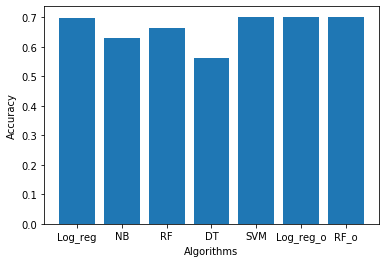

In [65]:
plt.bar(['Log_reg','NB','RF', 'DT', 'SVM', 'Log_reg_o','RF_o'],[acc_lr,acc_gnb,acc_rf,acc_dt,acc_svm,acc_clf,acc_rf_o_1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

### we can choose  one between SVM and RF _optimized, but SVM without hyperparameter tuning is giving the same value as obtained by hyperparameter tuning of  RF. So we shoud go with SVM beacause there is possibility that after HPT of SVM it can give more accuracy.

In [67]:
# confusion matrix based on random forest
con_matrix = confusion_matrix(y_val, y_pred_rf_o)
con_matrix

array([[ 63,  39],
       [ 41, 125]], dtype=int64)

In [70]:
report = classification_report(y_val, y_pred_rf_o)


In [71]:
print(report)

              precision    recall  f1-score   support

         0.0       0.61      0.62      0.61       102
         1.0       0.76      0.75      0.76       166

    accuracy                           0.70       268
   macro avg       0.68      0.69      0.68       268
weighted avg       0.70      0.70      0.70       268



In [94]:
#confusion matrix based on SVM

con_matrix = confusion_matrix(y_val, y_pred_svc_sc)
con_matrix

array([[ 62,  40],
       [ 40, 126]], dtype=int64)

In [95]:
report = classification_report(y_val, y_pred_svc_sc)

In [96]:
print(report)

              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61       102
         1.0       0.76      0.76      0.76       166

    accuracy                           0.70       268
   macro avg       0.68      0.68      0.68       268
weighted avg       0.70      0.70      0.70       268

